Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1444 - accuracy: 0.9560 - val_loss: 0.0605 - val_accuracy: 0.9800
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0376 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0420 - val_accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0364 - val_accuracy: 0.9884
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9885
Test accuracy: 0.9884999990463257
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 972    0    1    0    1    1    2    3    0    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   0    0 1022    3    0    0    0    5    2    0]
 [   0    0    1 1003    0    3    0    2    1    0]
 [   0

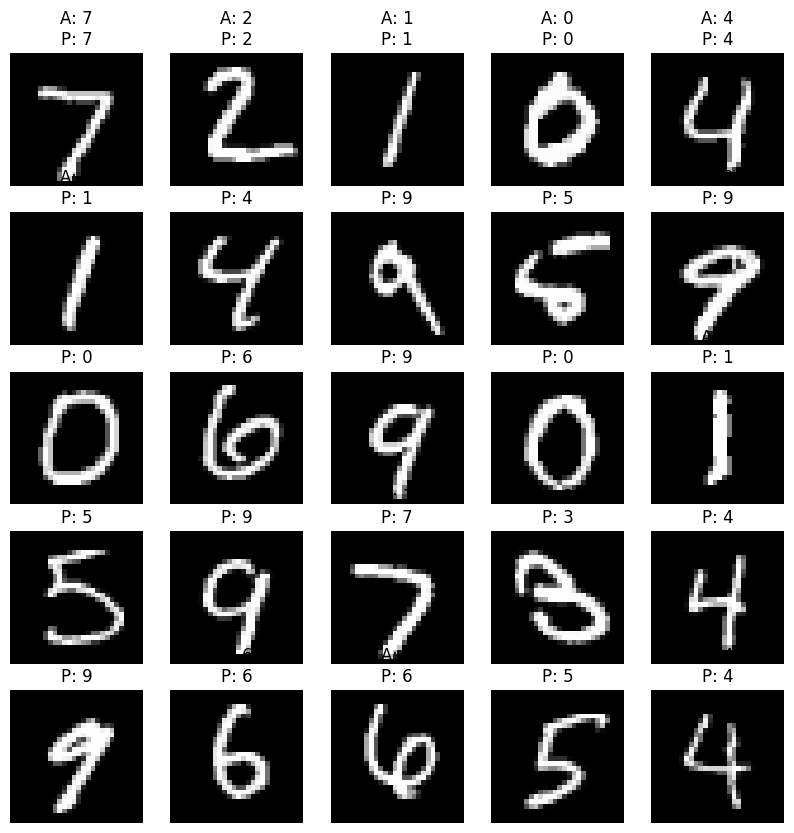

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, test_images = np.expand_dims(train_images, -1), np.expand_dims(test_images, -1)

# Define and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate and generate confusion matrix
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'A: {test_labels[i]}\nP: {predicted_labels[i]}')
    plt.axis('off')
plt.show()